# 【補足】データ前処理 応用

データの前処理について、再度種類を確認しておきます。  

1. 機械学習のアルゴリズムに適用できる形に変換する前処理
2. モデルの精度を向上させるために行う前処理

まず前者の前処理を施してスコアを確認し、その後精度向上の前処理を行いスコアの変化を確認します。  

## 機械学習で扱える形にする前処理

機械学習のアルゴリズムに適用できる形に変換していきます。以下の手順で進めていきます。  

- データの確認
- 欠損値処理
- カテゴリカル変数処理

### データの確認

まずは今回取り扱うデータを確認しましょう。  

In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [2]:
# 画像の読み込み
df = pd.read_csv('data/car_price.csv')
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [3]:
# データの形を確認
df.shape

(205, 26)

### 欠損値処理

**欠損値除去**

もう一度欠損値除去の2つの方法を確認します。  

| 方法                                 | 使う場面                           |
| ------------------------------------ | ---------------------------------- |
| 欠損値を含む行（サンプル）を取り除く | 欠損値の数が同一列内で多くない場合 |
| 欠損値を含む列（入力変数）を取り除く | 欠損値の数が同一列内で多すぎる場合 |

基本的には行（サンプル）を取り除く方法が用いられます。

まずは欠損値がどこにあるのかを確認しましょう。欠損値の確認には `.isnull()` で確認できます。  

欠損値の個数を確認するには `isnull().sum()` で各列ごとの欠損値の数の合計を確認できます。

In [4]:
# 欠損値の数を確認
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

欠損値の数があまり多くない、 `price` 、 `horsepower` 、 `peak-rpm` の列の欠損値が含まれている行を削除します。

In [5]:
# 削除前にshapeをもう一度確認しておきます。
df.shape

(205, 26)

In [6]:
df = df.dropna(subset=['price','horsepower','peak-rpm']) # デフォルトでaxis=0なので、行方向に削除が実行されます。

In [7]:
# サンプル数が減少していることが確認できました。
df.shape

(199, 26)

もっとも欠損値が多い`normalized-losses` は列ごと削除してしまいます。  

In [8]:
df = df.drop(labels='normalized-losses', axis=1)

In [9]:
df.shape

(199, 25)

In [10]:
df.head(3)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


**欠損値補完**  

補完に使用する値で代表的なものは　2　つありました。  

- 平均値
- 中央値

基本的には平均値で補完する事が多いですが、外れ値が多く含まれるようなデータでは、中央値を用いることが経験的に多いです。

In [11]:
# 欠損値の確認
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

欠損値が含まれている入力変数の中身を確認しましょう。

In [12]:
df['bore'].describe()

count    195.000000
mean       3.329385
std        0.271866
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

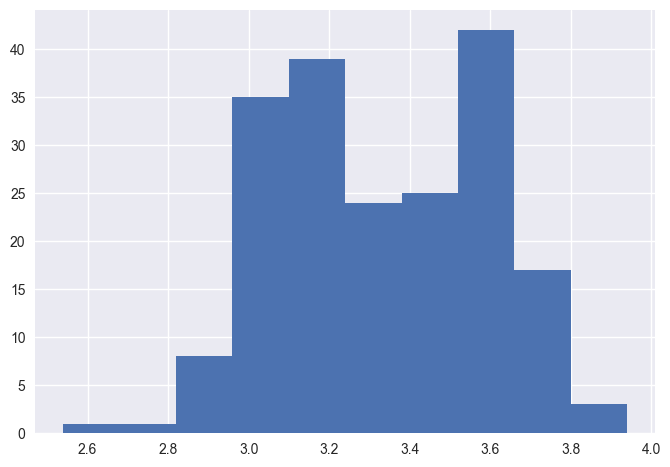

In [13]:
plt.hist(df['bore']);

データのばらつきが小さい、かつ外れ値が含まれていないデータの分布であることが確認できました。もう一つのデータも確認しておきましょう。

In [14]:
df['stroke'].describe()

count    195.000000
mean       3.250308
std        0.314115
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

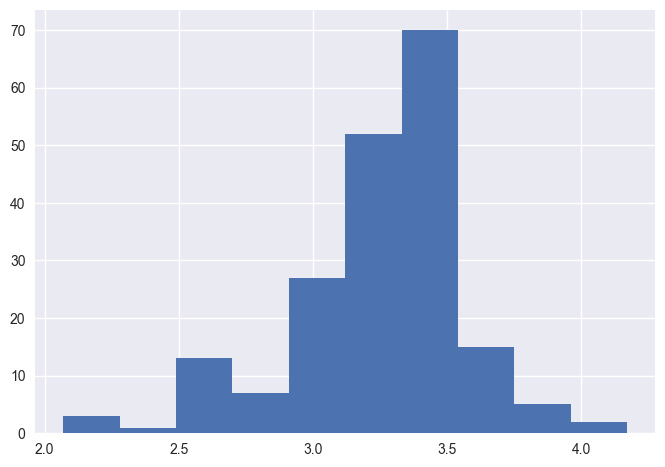

In [15]:
plt.hist(df['stroke']);

このようなデータの分布であれば平均値を入れることによって大きな影響は与えないことが想定できますので、今回は平均値で欠損値を補完しましょう。　　  

補完には `.fillna({'補完対象の列名'：補完する値})` で行えます。`df['列名'].mean()` で指定した列の平均値を算出しています。

In [16]:
# 欠損値を平均値で補完
df = df.fillna({'bore':df['bore'].mean(), 'stroke':df['stroke'].mean()})

In [17]:
# 欠損値の確認
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

あと一つ欠損値が含まれている列があるのですが、こちらは文字列になっています。文字列に対しての欠損値補完では　**最頻値** を使用するケースが多いです。   

最頻値は `.mode()` を使用して取得可能です。

In [18]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [19]:
df['num-of-doors'].mode()[0]

'four'

In [20]:
# 最頻値を使用して欠損値を補完
df = df.fillna({'num-of-doors':df['num-of-doors'].mode()[0]})

In [21]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

これでうまく欠損値を全てなくすことが出来ました。それでは、続いて文字列データ（カテゴリカル変数）をどのように数値に落とし込んでいくかみていきましょう。  

### カテゴリカル変数処理

カテゴリカル変数は、Label Encoding と One-Hot Encoding　の 2 種類を紹介しました。  

まずはカテゴリカル変数のデータを確認してみましょう。  

In [22]:
# カテゴリカル変数を含んだデータのみを抽出
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [23]:
# nunique()関数でそれぞれの列のユニークな値の数を確認することが出来ます。
df_uni = df_obj.nunique()
df_uni

make                21
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          6
num-of-cylinders     7
fuel-system          8
dtype: int64

**Label Encoding**　　

まずはユニークな値の数が2つの入力変数に対して Label Encoding を適用していきます。  

In [24]:
df_cols = df_uni[df_uni==2].index
df_cols

Index(['fuel-type', 'aspiration', 'num-of-doors', 'engine-location'], dtype='object')

文字列の種類が２種類の列名が取得できたので、続いてこの中の文字列を1, 0に変換していきます。  

1 つひとつ行っても良いのですが、今回は for 文を使用して繰り返し処理で行います。  

In [25]:
from sklearn.preprocessing import LabelEncoder
for col in df_cols:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [26]:
# Encodingが完了していることを確認
df[df_cols].head(2)

,fuel-type,aspiration,num-of-doors,engine-location
0,1,0,1,0
1,1,0,1,0


**One-Hot Encoding**  

`pd.get_dummies(df)` でOne-Hot Encoding を行いましょう。

In [27]:
df.shape

(199, 25)

In [28]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
df.head(3)

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df.shape

(199, 63)

うまく文字列データが数値（ダミー変数）に置き換わっていることが確認できます。これでようやくデータを機械学習のモデルに学習させることのできる形になりました。

精度向上のための前処理を施す前に、この時点でのスコアを一度確認しましょう。

### 重回帰分析の実装

先ほどのデータを使用して、重回帰分析を実装します。  

In [31]:
# 入力変数と目的変数の切り分け
t = df['price'].values
x = df.drop(['price'], axis=1).values

In [32]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [33]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [35]:
# モデルの検証
print('train score :', model.score(x_train, t_train))
print('test score :', model.score(x_test, t_test))

train score : 0.9734120796250461
test score : 0.8617805165929352


## データの前処理（応用）

精度向上のための前処理の方法をいくつか確認しましょう。  

- 特徴量エンジニアリング
- 外れ値除去

### 特徴量エンジニアリング

精度をあげる為の前処理の １ つとして、特徴量エンジニアリングについてご紹介します。特徴量エンジニアリングとは現在あるデータを用い、より有用なデータを作成することです。（外部のデータを使用するケースもあります。）  

今回は車のメーカーで分けてしまうよりも、メーカーをいくつかのクラスに分割してしまった方がいいかもしれません。車市場について調べてみるとメーカーによって下記のようなクラスに分類することができそうです。  

| メーカー                                                     | クラス | 説明   |
| ------------------------------------------------------------ | :----- | ------ |
| audi, bmw, jaguar, mercedes-benz, porsche                    | 3      | 高級層 |
| alfa-romero, chevrolet,  mercury, volvo, toyota, plymouth, dodge | 2      | 中間層 |
| honda, isuzu, mazda, mitsubishi, nissan, peugot, saab, subaru, volkswagen | 1      | 大衆層 |

In [36]:
# クラス分けのリストの定義
class_3 = ['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche']
class_2 = ['alfa-romero', 'chevrolet',  'mercury', 'volvo', 'toyota', 'plymouth', 'dodge']
class_1 = ['honda', 'isuzu', 'mazda', 'mitsubishi', 'nissan', 'peugot', 'saab', 'subaru', 'volkswagen']

In [37]:
# それぞれを置換するリストの作成
maker_class = []
for i in df_obj['make']:
    if i in class_3:
        maker_class.append(3)
    elif i in class_2:
        maker_class.append(2)
    elif i in class_1:
        maker_class.append(1)

作成したリストの中身を確認

In [38]:
maker_class[:10]

[2, 2, 2, 3, 3, 3, 3, 3, 3, 3]

In [39]:
df_obj['make'][:10]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
10            bmw
Name: make, dtype: object

こちらのリストをデータフレームに追加して、重回帰分析で学習済みモデルを作成します。まず、元のメーカーに関する入力変数は不要なので削除しておきましょう。

In [40]:
# データフレームをコピー
df2 = df.copy()

In [41]:
df2.columns

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylin

In [42]:
# メーカーの入力変数を削除
for col in df2.columns:
    if 'make' in col:
        df2 = df2.drop(col, axis=1)

In [43]:
df2.columns

Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_five',
       'num-of-cylinders_four', 'num-of-cylinders_six',
       'num-of-cylinders_three', 'num-of-cylinders_twelve',
       'num-of-cylinders_two', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')

In [44]:
# maker_class 列を追加
df2['maker_class']  = maker_class

In [45]:
df2.head()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,maker_class
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,0,2
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,1,0,0,2
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,1,0,0,2
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,1,0,0,3
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,3


高級層、中級層、大衆層の入力変数を作成できました。

#### 新たな入力変数を追加したデータで重回帰分析

In [46]:
# 入力変数と教師データの切り分け
t = df2['price'].values # df2に変更
x = df2.drop(['price'], axis=1).values # df2に変更

In [47]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [48]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [50]:
# モデルの検証
print('train score :', model.score(x_train, t_train))
print('test score :', model.score(x_test, t_test))

train score : 0.9515531314997501
test score : 0.8440907703445528


過学習は抑えることができましたが精度はあまり向上しませんでした。ドメイン知識がない為、適切な特徴量エンジニアリングができていないのかもしれません。今回はこのようなものがあるという程度の認識で大丈夫です。  

重要なのは適切な特徴量を作成するという部分にあります。  

### 外れ値除去

まず前提として外れ値は問題設定によって異なるという点をおさえておいてください。今回は外れ値除去の代表的な 2 つの手法をお伝えします。  

- 3σ法（平均値ベース）
- ハンペル判別法（中央値ベース）

それぞれの違いは平均値をベースにするものか、中央値ベースにするのかです。基本的には3σ法を採用し、それでうまく外れ値を検知出来ない場合はハンペル判別法を使うといいでしょう。  
（ハンペル判別法外れ値の数が多く、平均が引っ張られている場合などに有用な手法です。）

#### 3σ法

3σ 法の公式は下記です。x が 3σ の中に収まらないものを外れ値とみなします。  

| 文字 | 意味     |
| ---- | -------- |
| μ    | 平均     |
| σ    | 標準偏差 |
| x    | 数値     |

数式
$$
\mu-3\sigma \leq x \leq \mu +3\sigma
$$

では早速実装してみましょう。今回の対象は `price` の外れ値を除去します。  
まずは分布を確認しましょう。

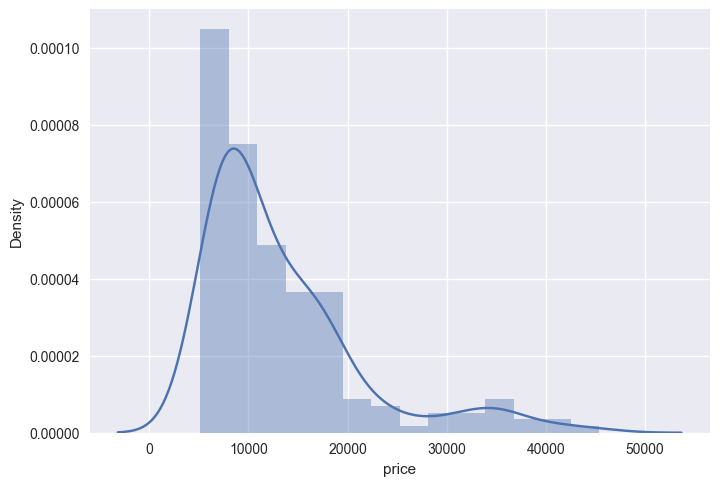

In [51]:
# 分布を表示
sns.distplot(df2['price']);

3σ法に必要な要素を準備します。

In [52]:
mu = df2['price'].mean() # 平均値を取得
sigma = df2['price'].std() # 標準偏差を取得

In [53]:
# 3σ法の中身を取得
df3 = df2[(mu - 3 * sigma < df2['price']) & (df2['price'] < mu + 3 * sigma)]

In [54]:
# オリジナルのデータフレーム
df2.shape

(199, 44)

In [55]:
# 外れ値除去後のデータフレーム
df3.shape

(196, 44)

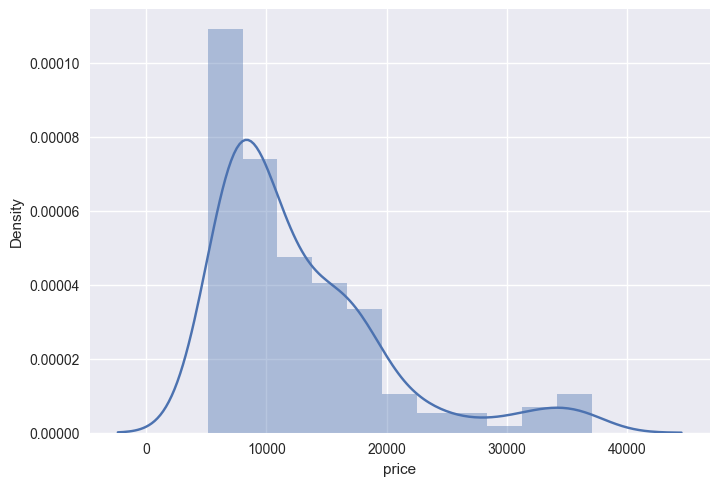

In [56]:
# 分布を表示
sns.distplot(df3['price']);

うまく外れ値（右端の辺りの値）を除去することができました。除去を行うかどうかは問題設定によって異なりますが、この手法は是非押さえておきましょう。  

**ハンペル判別法**

数式は下記になります。（median は中央値をあわらしています。）  
MAD は中央絶対誤差であり、「予測値と正解値の差（＝誤差）」の絶対値を計算していき、それら全ての計算結果を小さい順に並べた中で順位がちょうど中央に位置する値（＝中央値）です。

$$ median(x) ± 3MAD $$

$$ MAD = 1.4826 median(|x − median(x)|) $$

In [57]:
# 中央値を算出
median = df['price'].median()
median

10345.0

In [58]:
# absは指定の値を絶対値に変換。np.medianで中央値を算出
MAD = 1.4826 * np.median(abs(df['price']-median))
MAD

4975.6056

In [59]:
df4 = df2[(median - 3 * MAD < df2['price']) & (df2['price'] < median + 3 * MAD)]

In [60]:
df2.shape

(199, 44)

In [61]:
df4.shape

(182, 44)

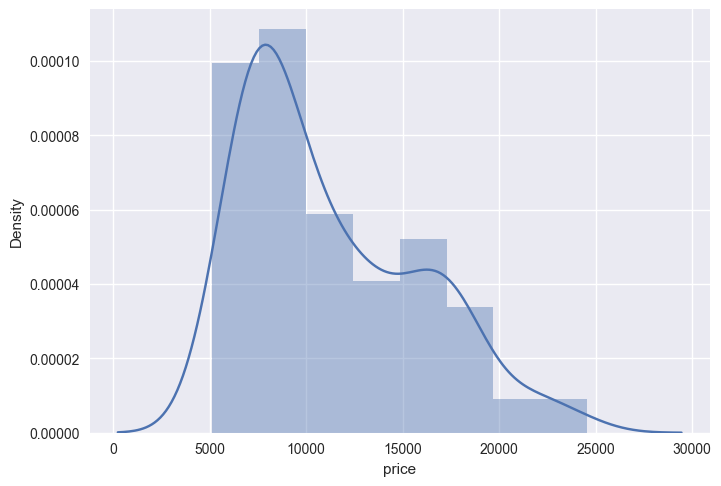

In [62]:
sns.distplot(df4['price']);

In [63]:
# 外れ値除去後のデータフレーム
df3.shape

(196, 44)

In [64]:
# 外れ値除去後のデータフレーム
df4.shape

(182, 44)

### 外れ値除去を行なったデータで重回帰分析
それでは、3σ 法で外れ値除去を行なったデータを用いて再度精度を確認してみましょう。

In [65]:
# 入力変数と教師データの切り分け
t = df3['price'].values #df3に変更
x = df3.drop(['price'], axis=1).values #df3に変更

In [66]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=1)

In [67]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [69]:
# モデルの検証
print('train score :', model.score(x_train, t_train))
print('test score :', model.score(x_test, t_test))

train score : 0.9531901963007725
test score : 0.8824611285104028


精度が上昇していることが確認できました。外れ値除去を行うポイントですが、行えば必ず精度が上がるわけではありません。データの分布や問題設定を考えた上で実行する必要があります。  